✅ 1. CSV 로드 및 데이터 확인

In [2]:
import pandas as pd

# CSV 불러오기
df = pd.read_csv("C:/Users/82104/sentiment_review_project/dataset/Hotel_Reviews_CLEAN.csv")


# 데이터 확인
print(df.columns)
print(df[['Processed', 'Sentiment']].head())

Index(['Review', 'Sentiment', 'Expanded_Review', 'Processed'], dtype='object')
                                           Processed  Sentiment
0                       park outside hotel beautiful          1
1  no real complaint hotel great great location s...          1
2  location good staff ok cute hotel breakfast ra...          1
3  great location nice surrounding bar restaurant...          1
4            amazing location build romantic setting          1


✅ 2. TF-IDF 벡터화

In [3]:
df = df.dropna(subset=['Processed']).reset_index(drop=True)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화 (최대 단어 5000개, 단어 단위)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Processed'])

# 타겟 변수 설정
y = df['Sentiment']

✅ 3. 학습/테스트 셋 분리

In [5]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

✅ 4. 로지스틱 회귀 분류기 학습

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


✅ 5. 예측 및 평가

In [7]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# 예측
y_pred = model.predict(X_test)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9287128949840541
F1 Score: 0.9287448425649077
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     72517
           1       0.94      0.93      0.94     94610

    accuracy                           0.93    167127
   macro avg       0.93      0.93      0.93    167127
weighted avg       0.93      0.93      0.93    167127

Confusion Matrix:
 [[66846  5671]
 [ 6243 88367]]


## 🔍 단어 중요도 기반 리뷰 키워드 분석
TF-IDF + LogisticRegression 모델이 학습한 가중치를 기반으로,
긍정/부정 감정 분류에 영향을 준 핵심 단어를 시각화합니다.

✅ [셀 1: 단어 중요도 추출]

In [24]:
import numpy as np
import pandas as pd
from IPython.display import display

# TF-IDF 벡터라이저의 단어 목록
feature_names = vectorizer.get_feature_names_out()

# 학습된 로지스틱 회귀 모델의 계수 (가중치)
coef = model.coef_[0]

# 상위 중요 단어 인덱스
top_n = 20
top_pos_idx = np.argsort(coef)[-top_n:]  # 긍정 단어
top_neg_idx = np.argsort(coef)[:top_n]   # 부정 단어

# 단어, 가중치, 감정 정보 결합
top_words_df = pd.DataFrame({
    "Word": np.concatenate([feature_names[top_neg_idx], feature_names[top_pos_idx]]),
    "Weight": np.concatenate([coef[top_neg_idx], coef[top_pos_idx]]),
    "Sentiment": ["Negative"] * top_n + ["Positive"] * top_n
})

# 결과 확인
display(top_words_df[top_words_df['Sentiment'] == 'Negative'])
display(top_words_df[top_words_df['Sentiment'] == 'Positive'])


,Word,Weight,Sentiment
0,not,-7.330683,Negative
1,lack,-6.312141,Negative
2,slow,-5.300906,Negative
3,no,-5.211147,Negative
4,bit,-5.138591,Negative
5,isn,-4.876228,Negative
6,small,-4.766922,Negative
7,dislike,-4.342799,Negative
8,poor,-4.342478,Negative
9,aren,-4.339950,Negative


,Word,Weight,Sentiment
20,superb,4.485572,Positive
21,clean,4.538908,Positive
22,delicious,4.595918,Positive
23,convenient,4.613503,Positive
24,hyde,4.637182,Positive
25,gorgeous,4.818751,Positive
26,modern,4.988929,Positive
27,stylish,5.046131,Positive
28,nice,5.092330,Positive
29,amazing,5.147494,Positive


🔍 감정 분류 모델 기반 핵심 키워드 시각화
TF-IDF 기반 벡터화와 로지스틱 회귀 모델을 활용하여, 숙소 리뷰에서 긍정 및 부정 감정 분류에 기여한 단어들을 추출하였습니다.
가중치가 큰 단어일수록 모델의 예측에 큰 영향을 주며, 감정 판단의 핵심 지표로 해석할 수 있습니다.

아래 시각화는 각 단어의 **모델 계수(weight)**를 기준으로 긍정/부정 감정에 기여도가 높은 상위 20개 단어씩을 보여줍니다. barplot은 긍정과 부정 감정에 영향을 준 핵심 키워드를 한눈에 비교할 수 있도록 시각화한 결과입니다.

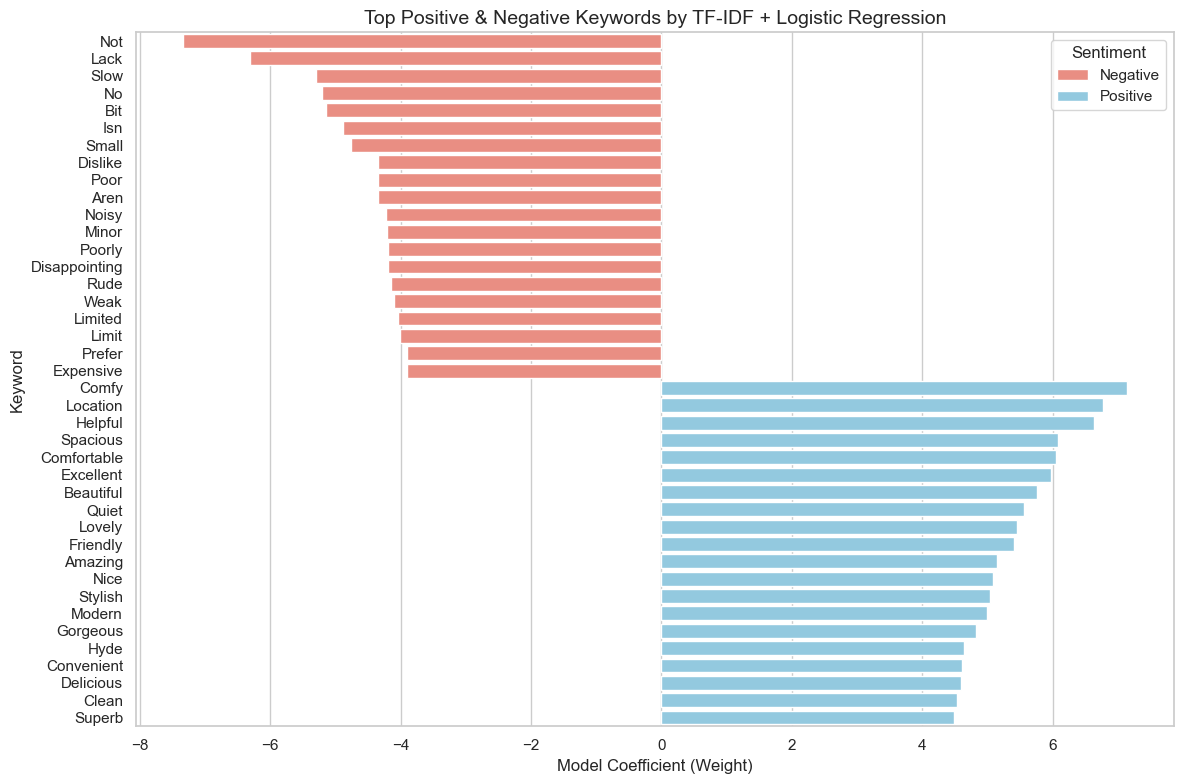

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# 막대 그래프 색상 지정
palette = {"Positive": "skyblue", "Negative": "salmon"}

# 시각화용 정렬: 긍정은 오름차순, 부정은 내림차순으로 출력되도록
viz_df = top_words_df.copy()
viz_df['AbsWeight'] = viz_df['Weight'].abs()  # 길이용
viz_df['Word'] = viz_df['Word'].str.capitalize()  # 단어 보기 좋게

# 단어 순서 고정: 부정 먼저, 긍정 나중
viz_df = pd.concat([
    viz_df[viz_df['Sentiment'] == 'Negative'].sort_values(by='Weight'),
    viz_df[viz_df['Sentiment'] == 'Positive'].sort_values(by='Weight', ascending=False)
])

# barplot
sns.barplot(
    data=viz_df,
    x="Weight", y="Word",
    hue="Sentiment", dodge=False,
    palette=palette
)

# 제목 및 라벨
plt.title("Top Positive & Negative Keywords by TF-IDF + Logistic Regression", fontsize=14)
plt.xlabel("Model Coefficient (Weight)")
plt.ylabel("Keyword")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

## 🔍 인사이트 도출 (Negative 단어 기반)

### ✅ 분석 근거
TF-IDF 기반 Logistic Regression 모델에서 가중치가 가장 낮은 단어들은 고객이 부정적인 감정을 가질 때 자주 언급한 표현입니다.  
주요 단어는 `not`, `lack`, `slow`, `no`, `small`, `disappointing`, `rude`, `poor`, `noisy`, `expensive` 등입니다.

---

### 💡 인사이트 요약

- **직원 응대 문제**  
  `rude`, `disappointing`, `poorly` 등의 표현은 직원의 태도나 서비스 품질이 불만족스럽다는 신호로 해석될 수 있습니다.  
  → _직원 교육 강화, CS 프로토콜 개선이 시급합니다._

- **시설 및 환경 이슈**  
  `noisy`, `small`, `limited`, `poor`, `weak` 등은 공간, 방음, 시설 낙후에 대한 불만을 나타냅니다.  
  → _객실 리모델링, 방음 개선, 시설 업그레이드 필요성이 제기됩니다._

- **가격 대비 만족도 저하**  
  `expensive`, `not`, `no`, `lack` 등은 기대 대비 부족하다는 평가로, 가성비에 대한 불만으로 해석됩니다.  
  → _가격 정책 재검토 또는 혜택 강화 필요_

---

### ✍️ 문단 요약

부정 감성 리뷰에서 추출된 핵심 단어를 분석한 결과, 고객 불만은 크게 세 가지로 요약됩니다.  
첫째, `rude`, `disappointing`, `poorly` 등 직원 관련 단어들이 높은 부정 가중치를 보여, 응대 태도나 서비스 품질에 대한 고객의 기대 불만이 뚜렷했습니다.  
둘째, `noisy`, `small`, `limited`, `poor` 등 공간·환경 관련 단어들도 자주 등장했으며, 이는 숙소의 물리적 조건이나 방음 문제로 인한 불만을 시사합니다.  
마지막으로, `expensive`, `not`, `lack` 등 단어는 기대 대비 부족한 경험을 암시하며, 가격 대비 만족도가 낮다는 인식을 반영합니다.  
따라서 서비스 전반의 품질 개선, 직원 응대 교육, 그리고 가성비 제고를 위한 전략 수립이 필요합니다.


## 🔍 인사이트 도출 (Positive 단어 기반)

### ✅ 분석 근거  
TF-IDF 기반 Logistic Regression 모델에서 가중치가 높은 단어들은 긍정적인 감정을 표현할 때 자주 등장한 단어들입니다.  
주요 단어는 `comfy`, `location`, `helpful`, `spacious`, `comfortable`, `excellent`, `friendly`, `clean`, `delicious`, `stylish` 등입니다.

---

### 💡 인사이트 요약

- **직원 서비스 만족도**  
  `helpful`, `friendly`, `lovely` 등의 단어는 직원의 친절함과 적극적인 응대가 긍정적인 리뷰의 핵심 요인임을 시사합니다.  
  → _이러한 응대를 유지하고, 우수 사례를 중심으로 서비스 매뉴얼을 정비하면 좋습니다._

- **숙소의 청결도 및 쾌적함**  
  `clean`, `comfortable`, `comfy`, `quiet` 등은 청결한 환경과 편안한 분위기에 대한 만족감을 나타냅니다.  
  → _청소 품질 유지 및 소음 관리 시스템 지속 운영이 중요합니다._

- **디자인 및 공간 만족도**  
  `modern`, `stylish`, `spacious`, `gorgeous`, `beautiful` 등의 단어는 숙소의 인테리어, 디자인, 넓이에 대한 긍정적 평가를 의미합니다.  
  → _공간감, 디자인 콘셉트 유지 및 홍보에 활용 가능_

- **입지와 접근성**  
  `location`, `convenient` 등의 단어는 숙소의 위치나 접근성이 긍정적인 리뷰의 중요한 요소임을 보여줍니다.  
  → _위치의 강점을 마케팅 요소로 적극 활용할 수 있습니다._

- **기대 이상의 경험**  
  `superb`, `amazing`, `excellent`, `delicious` 등의 단어는 전반적인 기대 이상 만족감을 표현합니다.  
  → _고객 경험 관리 및 서프라이즈 요소 강화로 차별화 가능_

---

### ✍️ 문단 요약

긍정 감성 리뷰에서 추출된 핵심 단어를 분석한 결과, 고객 만족 요인은 크게 다섯 가지로 요약됩니다.  
첫째, `helpful`, `friendly`, `lovely` 등은 직원 응대와 서비스 품질이 고객의 긍정 평가에 크게 기여했음을 보여줍니다.  
둘째, `clean`, `comfortable`, `comfy`, `quiet` 등 청결하고 쾌적한 환경에 대한 언급이 많았으며, 이는 고객 경험의 기본적 만족을 의미합니다.  
셋째, `modern`, `stylish`, `spacious` 등의 표현은 세련되고 넓은 공간에 대한 높은 평가를 시사합니다.  
넷째, `location`, `convenient`이라는 단어는 입지 조건이 만족도에 큰 영향을 미쳤음을 보여줍니다.  
마지막으로, `superb`, `excellent`, `delicious` 등은 기대 이상의 서비스나 시설에 대한 만족감을 나타냅니다.  
따라서 긍정적인 요소는 유지 및 강화하고, 이를 홍보와 차별화 전략에 적극 활용하는 것이 효과적입니다.
